In [26]:

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import *
N = ReferenceFrame('N')
f_1 =[]
f_2 = []
# todo add d axis
t, r, a, l, rc, w, m, mc, m3 = sy.symbols('t r a l rc w m mc m3')
base_v = (1,2,1,10, 0, 0)
deg = (0, 144, 216, 288, 72)
r3 = a*l
r4 = r-r3
A = w**2 * (r *( m3 + m)-mc*rc)
B = w**2 * -(r3 /l*m3 + m)*r**2/l
C = -(r4 /l*m3*r-mc*rc)

In [27]:
for i in range(5):
    th = t + np.deg2rad(deg[i])
    f1 = A*sy.cos(th)+B*sy.cos(2*th)
    f2 = A * sy.sin(th)
    f_1.append(f1)
    f_2.append(f2)
    print(i+1)
    print(f1)
    # print(f2)

F1 = sum(f_1)
F2 = sum(f_2)


# print(F2)
for i,j in zip((r,l,w,m, mc, m3), base_v):
    F1 = F1.subs(i,j)
    F2 = F2.subs(i,j)
Fs = F1*N.x + F2*N.y
ma = Fs.magnitude()
# print(F2)

1
w**2*(-mc*rc + r*(m + m3))*cos(t) + r**2*w**2*(-a*m3 - m)*cos(2*t)/l
2
w**2*(-mc*rc + r*(m + m3))*cos(t + 2.51327412287183) + r**2*w**2*(-a*m3 - m)*cos(2*t + 5.02654824574367)/l
3
w**2*(-mc*rc + r*(m + m3))*cos(t + 3.76991118430775) + r**2*w**2*(-a*m3 - m)*cos(2*t + 7.5398223686155)/l
4
w**2*(-mc*rc + r*(m + m3))*cos(t + 5.02654824574367) + r**2*w**2*(-a*m3 - m)*cos(2*t + 10.0530964914873)/l
5
w**2*(-mc*rc + r*(m + m3))*cos(t + 1.25663706143592) + r**2*w**2*(-a*m3 - m)*cos(2*t + 2.51327412287183)/l


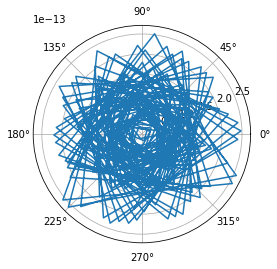

In [28]:
f = sy.lambdify(t, ma)
sp = np.linspace(0,1080, 250)
F_s = f(np.deg2rad(sp))
# sy.plot((-F2, F1), (t,0,1))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(sp, F_s)